In [56]:
%matplotlib inline
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [57]:
# load data from MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [58]:
# save X_test for later comparision 
X_plot = X_test
print X_test.shape

(10000, 28, 28)


In [59]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')


In [60]:
#An RGB color value is specified with: rgb(red, green, blue). 
#Each parameter (red, green, and blue) defines the intensity of the color as an integer between 0 and 255.
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [61]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print num_classes
#0 0 1 0 0 0 0 0 0 0 

10


In [62]:
# Define a sequential model

def baseline_model():
    # create model
    model = Sequential()
    # add CNN input layers
    model.add(Dense(output_dim=num_pixels, input_dim=num_pixels, init='normal', activation='relu'))
    model.add(Dense(output_dim=num_classes, init='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [63]:
# build the model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

/Users/qian/Program/anaconda/envs/mypython2.7/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="normal", activation="relu", input_dim=784, units=784)`
  import sys
/Users/qian/Program/anaconda/envs/mypython2.7/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, activation="softmax", kernel_initializer="normal")`
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
5s - loss: 0.2766 - acc: 0.9216 - val_loss: 0.1418 - val_acc: 0.9586
Epoch 2/10
5s - loss: 0.1097 - acc: 0.9683 - val_loss: 0.0899 - val_acc: 0.9729
Epoch 3/10
5s - loss: 0.0692 - acc: 0.9803 - val_loss: 0.0790 - val_acc: 0.9741
Epoch 4/10
4s - loss: 0.0484 - acc: 0.9866 - val_loss: 0.0701 - val_acc: 0.9783
Epoch 5/10
1s - loss: 0.0368 - acc: 0.9898 - val_loss: 0.0633 - val_acc: 0.9788
Epoch 6/10
4s - loss: 0.0260 - acc: 0.9932 - val_loss: 0.0634 - val_acc: 0.9809
Epoch 7/10
4s - loss: 0.0195 - acc: 0.9946 - val_loss: 0.0622 - val_acc: 0.9803
Epoch 8/10
4s - loss: 0.0148 - acc: 0.9964 - val_loss: 0.0610 - val_acc: 0.9817
Epoch 9/10
4s - loss: 0.0109 - acc: 0.9979 - val_loss: 0.0619 - val_acc: 0.9807
Epoch 10/10
4s - loss: 0.0075 - acc: 0.9987 - val_loss: 0.0579 - val_acc: 0.9826
Baseline Error: 1.74%


In [64]:
#print the indices of failed recognitions
predicted_cls = model.predict_classes(X_test)
one_hot = np_utils.to_categorical(predicted_cls)
indices = np.where(y_test != one_hot)[0]
print indices

 9792/10000 [============================>.] - ETA: 0s[ 149  149  247  247  321  321  340  340  381  381  445  445  449  449  495
  495  582  582  583  583  619  619  691  691  717  717  720  720  877  877
  938  938  947  947  951  951 1014 1014 1039 1039 1112 1112 1128 1128 1156
 1156 1182 1182 1224 1224 1226 1226 1232 1232 1242 1242 1247 1247 1319 1319
 1326 1326 1328 1328 1337 1337 1393 1393 1395 1395 1444 1444 1494 1494 1522
 1522 1530 1530 1531 1531 1549 1549 1609 1609 1621 1621 1681 1681 1709 1709
 1717 1717 1790 1790 1828 1828 1901 1901 1941 1941 1984 1984 1987 1987 2004
 2004 2053 2053 2098 2098 2109 2109 2118 2118 2130 2130 2182 2182 2272 2272
 2293 2293 2369 2369 2387 2387 2433 2433 2488 2488 2582 2582 2618 2618 2648
 2648 2654 2654 2730 2730 2877 2877 2927 2927 2939 2939 2953 2953 3062 3062
 3073 3073 3117 3117 3172 3172 3251 3251 3289 3289 3384 3384 3405 3405 3422
 3422 3451 3451 3503 3503 3520 3520 3558 3558 3559 3559 3567 3567 3597 3597
 3681 3681 3718 3718 3727 3727 378

('predicted: ', 9)
('actual: ', 2)


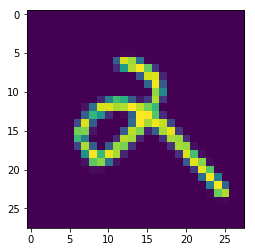

('predicted: ', 9)
('actual: ', 2)


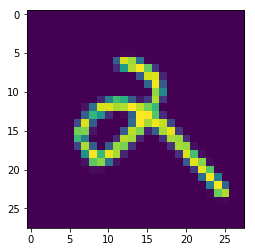

('predicted: ', 2)
('actual: ', 4)


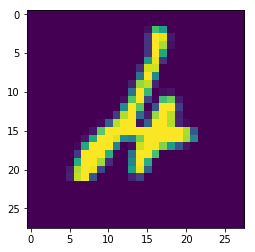

('predicted: ', 2)
('actual: ', 4)


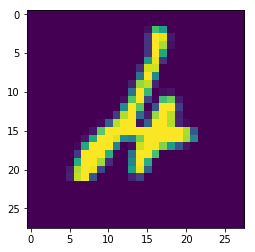

('predicted: ', 7)
('actual: ', 2)


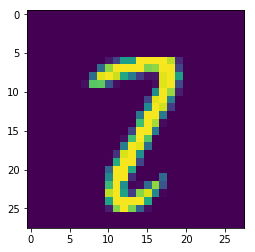

('predicted: ', 7)
('actual: ', 2)


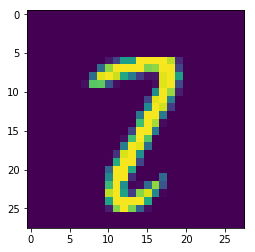

('predicted: ', 3)
('actual: ', 5)


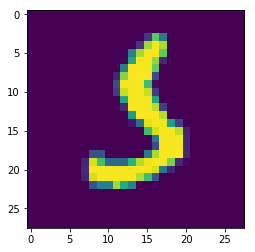

('predicted: ', 3)
('actual: ', 5)


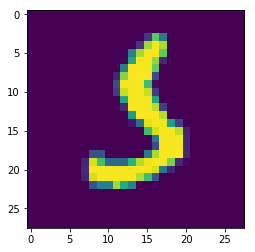

('predicted: ', 7)
('actual: ', 3)


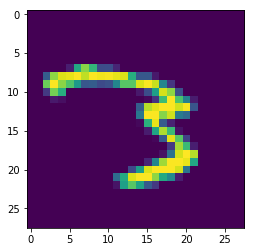

('predicted: ', 7)
('actual: ', 3)


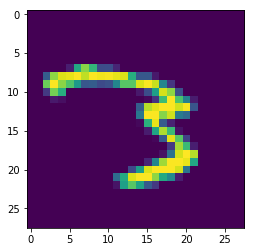

In [67]:
# plot the failed recognitions
for i in indices[0:10]:
    plt.imshow(X_plot[i])
    print("predicted: ", predicted_cls[i])
    print("actual: ",np.where(y_test[i]==1)[0][0]) 
    plt.show()